# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Exploring the dataset of Student Intervention System

In this notebook I'm trying to visualize the dataset in order to get a better understanding of it.

In [1]:

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


In [2]:
print "number of instances:\t" + str(student_data.shape[0]) + "\nnumber of features:\t" + str(student_data.shape[1])
print student_data.columns
student_data.describe()
student_data.dtypes

number of instances:	395
number of features:	31
Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [3]:
def occurenceplot(col):
    fig = plt.figure() # Create matplotlib figure

    ax = fig.add_subplot(111) # Create matplotlib axes

    width = 0.4
    #col= "absences"
    #TODO: merge indexes
    all_values = pd.DataFrame(np.unique(student_data.absences))
    all_values.set_index(0)
    
    # calculate the relative occurences
    passed = student_data_passed[[col]].apply(pd.value_counts)/student_data_passed.shape[0]
    failed = student_data_failed[[col]].apply(pd.value_counts)/student_data_failed.shape[0]
    
    passed.sort_index().plot(kind='bar', color='red', ax=ax, width=width, position=1)
    failed.sort_index().plot(kind='bar', color='blue', ax=ax, width=width, position=0)
    
    ax.legend(["passed", "failed"]);
    ax.set_ylabel('Amount')
    ax.set_xlabel(col)
    plt.xticks(x=np.unique(student_data[col]),rotation='horizontal')
    plt.gca().set_xlim(left=-0.5)
    plt.show()
    return


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 40 54]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 22 26 28 30 38 56 75]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 30 38 40 54 56 75]


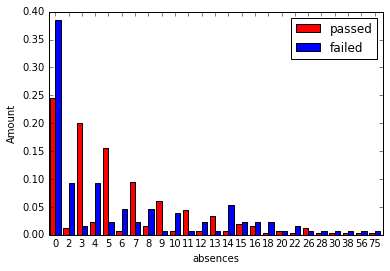

In [4]:
student_data_passed = student_data[student_data.passed=='yes']
student_data_failed = student_data[student_data.passed=='no']

x = student_data_failed[["absences"]].apply(pd.value_counts)/student_data_passed.shape[0]
print np.unique(student_data_passed.absences)
print np.unique(student_data_failed.absences)
print np.unique(student_data.absences)
occurenceplot("absences")
#for column in student_data.columns: occurenceplot(column)

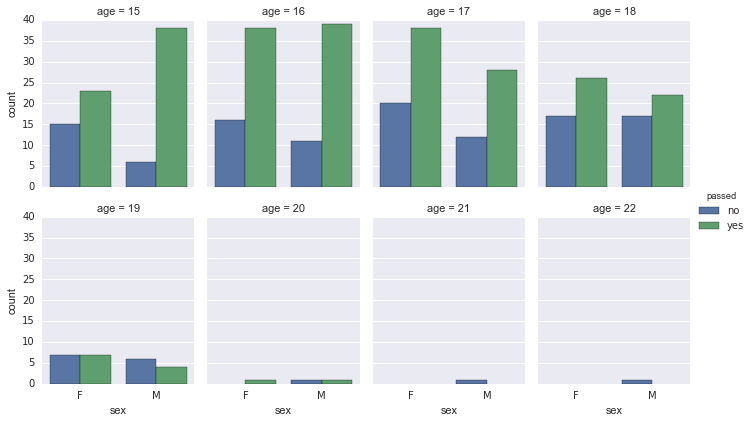

In [5]:
import seaborn as sns
_ = sns.factorplot("sex", col="age", col_wrap=4,
                   data=student_data, hue='passed',
                   kind="count", size=3, aspect=.8)

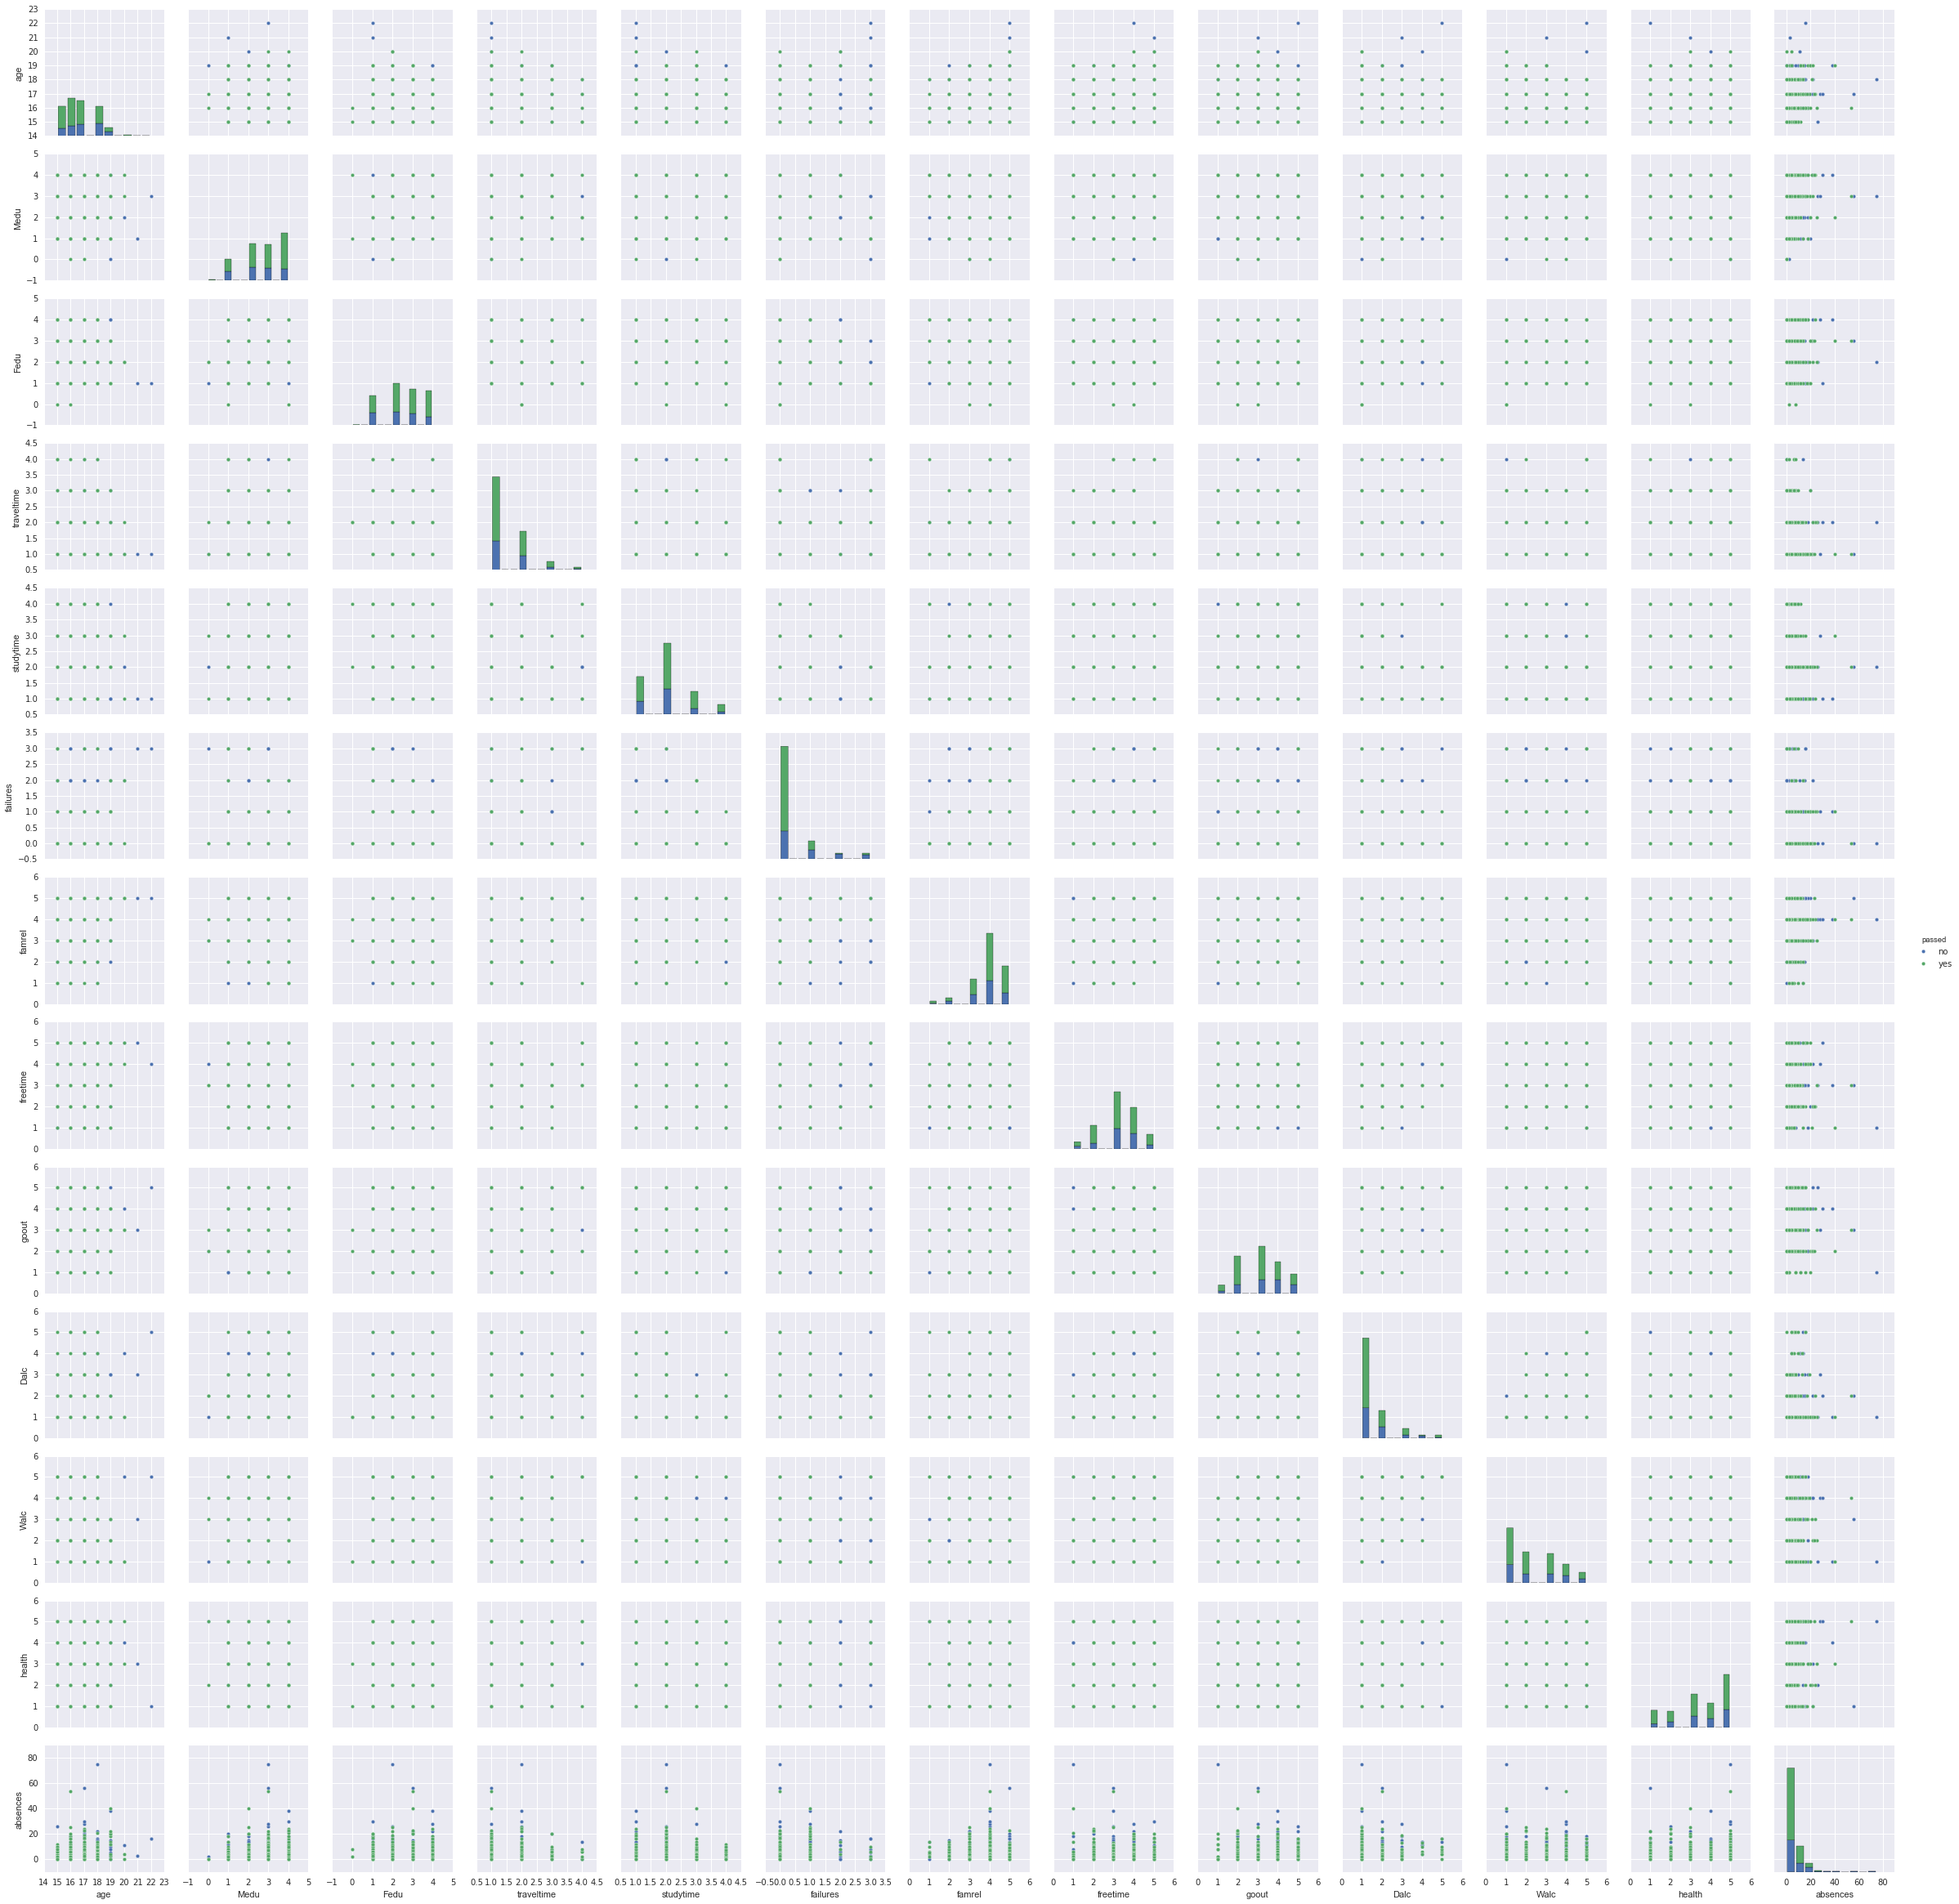

In [6]:
sns.pairplot(student_data, hue="passed")